# Vinho Verde - Exercise

We just performed linear regression involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables (multiple linear regression).

In this exercise we will use a dataset with variants of the Portuguese *Vinho Verde* wine. We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features we will try to predict the quality of the wine.

Saturday I am receiving friends for dinner. I would like to offer my guests a glass of wine. I am currently shopping and I've got my eye on the next bottle of wine from Portugal. *(It is unbelievable what information can be found on a wine label these days)*

<table>
    <tr>
        <td>
            volatile acidity: 0.650<br />
            citric acid: 0.00<br />
            residual sugar: 1.2<br />
            chlorides: 0.089<br />
            free sulfur dioxide: 21.0<br />
            density: 1.3946<br />
            pH: 3.39<br />
            sulphates: 0.53<br />
            alcohol: 9.6<br />
        </td>
        <td>
            <img src="./resources/calamares.jpg"  style="height: 250px"/>
        </td>
    </tr>
</table>

Would this wine be a good choice? Can you help me?

## 1. Import and read the data

Import all the required libraries :

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
# prompt: unzip resources.zip

!unzip resources.zip


Archive:  resources.zip
  inflating: resources/calamares.jpg  
  inflating: resources/LRgraph.png   
  inflating: resources/LRoverunder.png  
  inflating: resources/LRpol.png     
  inflating: resources/scikit.png    
  inflating: resources/video1.png    
  inflating: resources/video2.png    
  inflating: resources/vinho-verde.png  
  inflating: resources/weather.csv   
  inflating: resources/winequality.csv  


Import the file *winequality.csv* using Pandas.

In [25]:
wine_df = pd.read_csv('./resources/winequality.csv')

## 2. Explore the data

Can you check the number of rows and columns in our dataset?

In [26]:
wine_df.shape

(1599, 12)

What features of the wines are included in the data?

In [27]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Can you print the quality of the first 25 wines? What values are being used?

In [28]:
wine_df.head(25)['quality']

0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
20    6
21    5
22    5
23    5
24    6
Name: quality, dtype: int64

Can you print all different values and count them?

In [29]:
wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Can you check on a 2-D graph if there's any relationship between the fixed acidity and the pH of the wine?

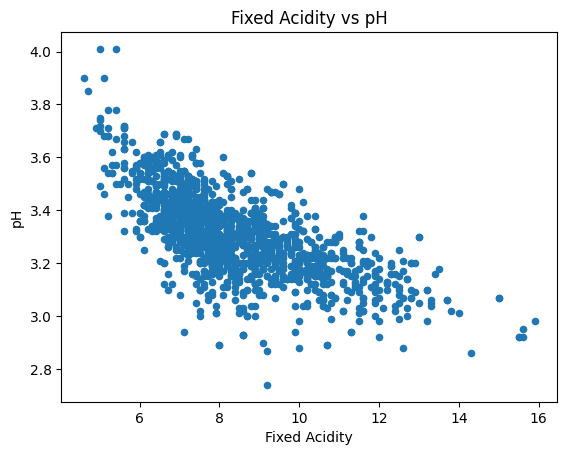

In [30]:
wine_df.plot.scatter(x='fixed acidity', y='pH')
plt.title('Fixed Acidity vs pH')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show()

What can you see in the graph? The higher the fixed acidity, the ... the pH. You shoudn't be surprised, since pH is a scale used to specify how acidic a fluid is.

## 3. Histograms

Let’s check the quality of the wines. Create a histogram. What qualities occur the most?

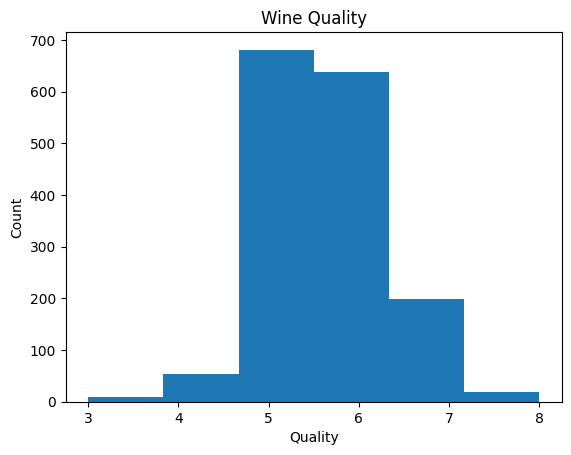

In [31]:
wine_df['quality'].plot(kind='hist',bins=int(6))
plt.title('Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## 4. Data splicing

Our next step is to divide the data into independent variables and dependent variables, whose values are to be predicted. To make the predictions we are only using the following independent variables

- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- density
- pH
- sulphates
- alcohol

to predict the quality. Create the two datasets and next, split 80% of the data to the training set and 20% to the test set.

In [36]:
X = wine_df[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
y = wine_df['quality'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Print the independent and dependent training set.

In [22]:
print(X_train)


      volatile acidity  citric acid  residual sugar  chlorides  \
642              0.540         0.45             2.3      0.071   
679              0.260         0.45             3.3      0.060   
473              0.350         0.55             2.1      0.062   
390              0.850         0.05             1.4      0.045   
1096             0.725         0.09             5.5      0.117   
...                ...          ...             ...        ...   
763              0.655         0.26             2.0      0.096   
835              0.665         0.10             1.5      0.066   
1216             0.570         0.31             2.0      0.079   
559              0.470         0.49             4.3      0.085   
684              0.980         0.32             2.3      0.078   

      free sulfur dioxide  density    pH  sulphates  alcohol  
642                  16.0  0.99910  3.39       0.62      9.4  
679                  20.0  0.99720  3.13       0.54      9.6  
473               

In [37]:
print(y_train)

[[5]
 [5]
 [5]
 ...
 [6]
 [6]
 [5]]


## 5. Train the model

Now train the model.

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [39]:
coefficients = model.coef_.reshape(9,-1)
variables = np.array([['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]).reshape(9,-1)

coeff = pd.DataFrame(coefficients, variables)

print(coeff)

                               0
(volatile acidity,)    -1.252481
(citric acid,)         -0.216489
(residual sugar,)       0.009585
(chlorides,)           -1.851510
(free sulfur dioxide,) -0.003105
(density,)              5.179929
(pH,)                  -0.441514
(sulphates,)            0.850351
(alcohol,)              0.314215


This means that for a unit increase in *density*, there is an increase of 5.17 units in the quality of the wine. Similarly, a unit decrease in *chlorides* results in an increase of 1.85 units in the quality of the wine.

## 6. Predictions

Now that we have trained our model, it’s time to make some predictions. Do the prediction on test data.

In [40]:
y_pred = model.predict(X_test)

Print the actual and predicted values for the first 25 wines from the test set.

In [53]:
compare_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
compare_df.head(25)

,Actual,Predicted
0,6,5.770024
1,5,4.998167
2,7,6.555406
3,6,5.309407
4,5,5.802326
5,6,5.160463
6,5,5.346038
7,6,5.900482
8,4,4.770874
9,5,5.037561


Visualize the comparison result as a bar graph. Take only the first 10 results.

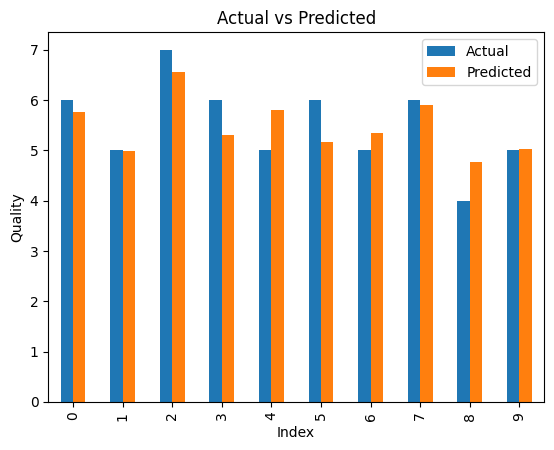

In [54]:
compare_df.head(10).plot(kind='bar')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Quality')
plt.show()

The final step is to evaluate the performance of the algorithm. Since R² = 1 corresponds to the perfect fit, what can you conclude?

In [58]:
from sklearn import metrics

print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test, y_pred), 2))
print("Root mean squared error =", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print("R² =", round(metrics.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.48
Mean squared error = 0.39
Root mean squared error = 0.63
R² = 0.31


In [ ]:
# answer: value of R²?
# ok?

Finaly can you predict the quality of my wine (details above)? Is it a good wine according to our model?

In [59]:
my_wine =  [[0.650, 0.00, 1.2, 0.089, 21.0, 1.3946, 3.39, 0.53, 9.6]]
my_wine_pred = model.predict(my_wine)
print(my_wine_pred)

[[7.18304495]]


In [ ]:
# answer: quality of wine?
#good